In [4]:
!pip install folium


In [6]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap


In [8]:
df = pd.read_csv("../dataset/final_women_safety_data.csv")
print("Data Loaded Successfully!")

Data Loaded Successfully!


In [9]:
df.head()


,nm_pol,area,rape,gangrape,sexual_harassment,totarea,lat,long,totalcrime,crime_per_area,hybrid_score,risk_score,risk_cluster,risk_level
0,CHITRANJAN PARK,2.659330,6,1,7,2659329.537,28.53632,77.24920,512,192.529731,22.426752,23.053469,0,Very Low
1,DABRI,3.401013,28,0,16,3401013.428,28.61268,77.08600,397,116.729912,77.258160,79.417141,1,High
2,MALVIYA NAGAR,1.379854,28,1,15,1379853.572,28.52989,77.20418,837,606.586102,76.426850,78.562600,1,High
3,CHANDNI MAHAL,5.570696,8,1,7,5570696.132,28.64361,77.23608,588,105.552338,26.269507,27.003609,2,Low
4,MODEL TOWN,2.689157,4,1,14,2689157.085,28.70257,77.19369,466,173.288501,28.847573,29.653719,2,Low


C:\Users\dell\AppData\Local\Temp\ipykernel_11152\1363231030.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='risk_level', palette='viridis', order=['Very Low','Low','Medium','High'])


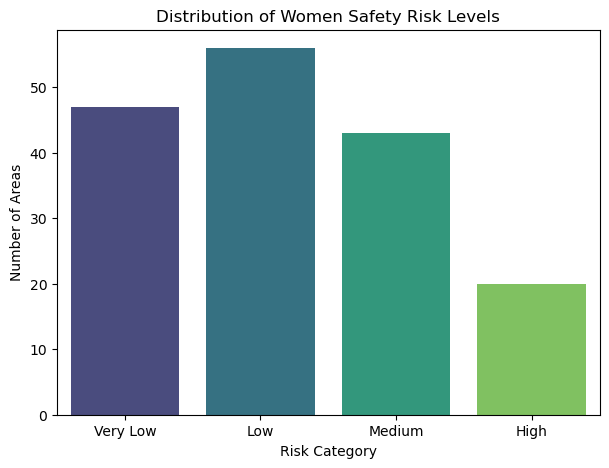

In [10]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='risk_level', palette='viridis', order=['Very Low','Low','Medium','High'])
plt.title("Distribution of Women Safety Risk Levels")
plt.xlabel("Risk Category")
plt.ylabel("Number of Areas")
plt.show()


In [11]:
print("🔴 Top 10 Most Unsafe Locations:")
display(df[['nm_pol','area','risk_level','risk_score']].sort_values(by='risk_score', ascending=False).head(10))

print("\n🟢 Top 10 Safest Locations:")
display(df[['nm_pol','area','risk_level','risk_score']].sort_values(by='risk_score', ascending=True).head(10))


🔴 Top 10 Most Unsafe Locations:


,nm_pol,area,risk_level,risk_score
57,KESHAV PURAM,1.352845,High,100.000000
46,AMAR COLONY,1.505937,High,88.591586
132,NEW ASHOK NAGAR,3.300805,High,88.101331
151,MANSAROVAR PARK,2.231366,High,87.421006
31,BARAKHAMBA ROAD,3.748442,High,85.577189
72,MOTI NAGAR,3.148605,High,83.574450
157,BHAJANPURI,10.157992,High,82.338524
113,RANHOLA,11.283824,High,80.668923
1,DABRI,3.401013,High,79.417141
2,MALVIYA NAGAR,1.379854,High,78.562600



🟢 Top 10 Safest Locations:


,nm_pol,area,risk_level,risk_score
114,SAKET,2.732946,Very Low,0.000000
111,DWARKA SEC-23,30.068548,Very Low,3.482269
144,GULABIBAGH,2.218660,Very Low,3.667055
110,GANDHI NAGAR,1.205111,Very Low,5.457339
148,GHAZIPUR,2.886810,Very Low,5.457339
49,VASANT KUNJ SOUTH,14.105372,Very Low,6.496666
64,VIVEKVIHAR,4.731869,Very Low,6.496666
41,SAMAYPURBADLI,3.249865,Very Low,6.964538
92,VIKAS PURI,1.247662,Very Low,8.085066
158,ZAFRABAD,1.576237,Very Low,8.471736


In [12]:
# Create base map centered around Delhi
m = folium.Map(location=[28.61, 77.23], zoom_start=10, tiles="cartodbpositron")

# Color scheme for risk levels
color_map = {
    "Very Low": "green",
    "Low": "lightgreen",
    "Medium": "orange",
    "High": "red"
}

# Add markers
for i, row in df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=7,
        popup=(
            f"<b>{row['nm_pol']}</b><br>"
            f"Area: {row['area']}<br>"
            f"Risk Level: {row['risk_level']}<br>"
            f"Score: {row['risk_score']:.2f}"
        ),
        color=color_map[row['risk_level']],
        fill=True,
        fill_color=color_map[row['risk_level']],
        fill_opacity=0.8
    ).add_to(m)

m.save("../app/women_safety_markermap.html")
m


In [13]:
heatmap_data = df[['lat','long','risk_score']].values.tolist()

hm = folium.Map(location=[28.61, 77.23], zoom_start=10, tiles="stamentoner")

HeatMap(
    heatmap_data,
    radius=18,
    blur=12,
    max_zoom=12,
).add_to(hm)

hm.save("../app/women_safety_heatmap.html")
hm
